In [1]:
#this is used for display all output of jupyter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

## 1. Import useful package

In [98]:
import pandas as pd
import numpy as np
from scipy import stats 
import networkx as nx     #this is main package for network anaylsisi
import nxviz as nv        #used for visilziation
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations 

#this package is used for some basic visulization
from nxviz import MatrixPlot
from nxviz import CircosPlot
from nxviz import ArcPlot

import heapq     #used for find most several biggest


<br>

<br>

<br>

## 2.Use Book1 to do basic data exploration

In [3]:
# Reading in datasets/book1.csv
book1 =pd.read_csv('03_data/book1.csv')
#dataset_1 = pd.read_csv('29_data/14_Weather.csv')
# Printing out the head of the dataset
book1.shape
#we have 684 pair relationships which are between two charaters undirect

(684, 5)

In [4]:
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


The resulting DataFrame <code>book1</code> has 5 columns: <code>Source</code>, <code>Target</code>, <code>Type</code>, <code>weight</code>, and <code>book</code>. Source and target are the two nodes that are linked by an edge. A network can have directed or undirected edges and in this network all the edges are undirected. The weight attribute of every edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.

In [5]:
book1.describe()

,weight,book
count,684.000000,684.0
mean,10.769006,1.0
std,17.294432,0.0
min,3.000000,1.0
25%,4.000000,1.0
50%,5.000000,1.0
75%,11.000000,1.0
max,291.000000,1.0


According to the describe, we only have several outllier datapoint(291 weight) most of datapoint only distriion in 0-11.

In [6]:
# Creating an empty graph object
G_book1 = nx.Graph()

In [7]:
 
#the first itterows returen the index and second parameter return series contain all rows
for source_1, target_1  in book1.iterrows():
#    G_book1.add_edge(edge['Source'],edge['Target'],weight=edge['weight'])
    print(source_1,'\n')
    print("-"*30)
    print(target_1["Source"],'\n')
    print("*"*100)
    
"""" 
print(type(source_1))
print(type(target_1))

#test for intertuples
for row in book1.itertuples():
    print(row)
print(type(row))


G_book1.edges()
"""

0 

------------------------------
Addam-Marbrand 

****************************************************************************************************
1 

------------------------------
Addam-Marbrand 

****************************************************************************************************
2 

------------------------------
Aegon-I-Targaryen 

****************************************************************************************************
3 

------------------------------
Aegon-I-Targaryen 

****************************************************************************************************
4 

------------------------------
Aemon-Targaryen-(Maester-Aemon) 

****************************************************************************************************
5 

------------------------------
Aemon-Targaryen-(Maester-Aemon) 

****************************************************************************************************
6 

------------------------------
Aemon-T

Clement-Piper 

****************************************************************************************************
240 

------------------------------
Cohollo 

****************************************************************************************************
241 

------------------------------
Cohollo 

****************************************************************************************************
242 

------------------------------
Cohollo 

****************************************************************************************************
243 

------------------------------
Cohollo 

****************************************************************************************************
244 

------------------------------
Colemon 

****************************************************************************************************
245 

------------------------------
Conn 

***************************************************************************************************

458 

------------------------------
Jeor-Mormont 

****************************************************************************************************
459 

------------------------------
Jeyne-Poole 

****************************************************************************************************
460 

------------------------------
Jeyne-Poole 

****************************************************************************************************
461 

------------------------------
Jeyne-Poole 

****************************************************************************************************
462 

------------------------------
Jeyne-Poole 

****************************************************************************************************
463 

------------------------------
Jhiqui 

****************************************************************************************************
464 

------------------------------
Jhogo 

***********************************************

632 

------------------------------
Robb-Stark 

****************************************************************************************************
633 

------------------------------
Robb-Stark 

****************************************************************************************************
634 

------------------------------
Robb-Stark 

****************************************************************************************************
635 

------------------------------
Robb-Stark 

****************************************************************************************************
636 

------------------------------
Robb-Stark 

****************************************************************************************************
637 

------------------------------
Robb-Stark 

****************************************************************************************************
638 

------------------------------
Robb-Stark 

********************************************

'" \nprint(type(source_1))\nprint(type(target_1))\n\n#test for intertuples\nfor row in book1.itertuples():\n    print(row)\nprint(type(row))\n\n\nG_book1.edges()\n'

From this iterrow, we can see that for caluse return two parts data, first is row index, second is other parts of dataframe. So, we can get <code>target_1["Source"]</code>,<code>target_1["weight"]</code>

In networkx constuction,we have three 'columns' = Source + Targe + weight

In [8]:
# Iterating through the DataFrame to add edges which contain "Source","Target","Weight"
for _, edge in book1.iterrows():
    G_book1.add_edge(edge["Source"],edge["Target"],weight=edge["weight"])

In [9]:
#In book 1 we have 187 character and there are 684 edges between these charaters
display(len(G_book1.nodes))
display(len(G_book1.edges))

187

684

<br>

<br>

## 3. nvxiz can do some basic visilization graph, but more complicated still need Gehpi

{'Addam-Marbrand': array([0.24311566, 0.1321763 ]),
 'Jaime-Lannister': array([0.01990503, 0.05919503]),
 'Tywin-Lannister': array([0.04868969, 0.06084924]),
 'Aegon-I-Targaryen': array([ 0.07939872, -0.29844737]),
 'Daenerys-Targaryen': array([ 0.00874759, -0.42095872]),
 'Eddard-Stark': array([0.00777735, 0.00799933]),
 'Aemon-Targaryen-(Maester-Aemon)': array([-0.27687692,  0.1553444 ]),
 'Alliser-Thorne': array([-0.21622003,  0.09356247]),
 'Bowen-Marsh': array([-0.30828256,  0.09063287]),
 'Chett': array([-0.34533132,  0.22490708]),
 'Clydas': array([-0.53732526,  0.30104058]),
 'Jeor-Mormont': array([-0.19157282,  0.06172963]),
 'Jon-Snow': array([-0.14742382,  0.10388101]),
 'Samwell-Tarly': array([-0.21195415,  0.15296117]),
 'Aerys-II-Targaryen': array([0.13214714, 0.00635738]),
 'Brandon-Stark': array([0.11467777, 0.06552371]),
 'Gerold-Hightower': array([0.36266016, 0.09926801]),
 'Jon-Arryn': array([ 0.07033773, -0.0138593 ]),
 'Robert-Baratheon': array([ 0.00022754, -0.055

d:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


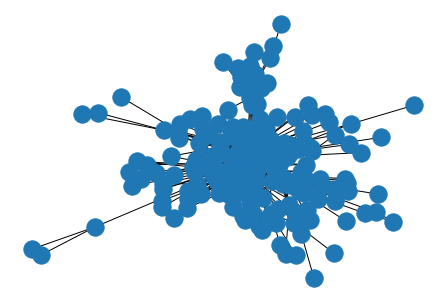

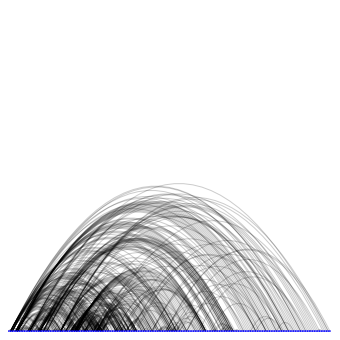

NodeDataView({'Addam-Marbrand': None, 'Jaime-Lannister': None, 'Tywin-Lannister': None, 'Aegon-I-Targaryen': None, 'Daenerys-Targaryen': None, 'Eddard-Stark': None, 'Aemon-Targaryen-(Maester-Aemon)': None, 'Alliser-Thorne': None, 'Bowen-Marsh': None, 'Chett': None, 'Clydas': None, 'Jeor-Mormont': None, 'Jon-Snow': None, 'Samwell-Tarly': None, 'Aerys-II-Targaryen': None, 'Brandon-Stark': None, 'Gerold-Hightower': None, 'Jon-Arryn': None, 'Robert-Baratheon': None, 'Aggo': None, 'Drogo': None, 'Jhogo': None, 'Jorah-Mormont': None, 'Quaro': None, 'Rakharo': None, 'Albett': None, 'Halder': None, 'Rast': None, 'Grenn': None, 'Pypar': None, 'Tyrion-Lannister': None, 'Alyn': None, 'Harwin': None, 'Jory-Cassel': None, 'Tomard': None, 'Arthur-Dayne': None, 'Arya-Stark': None, 'Benjen-Stark': None, 'Bran-Stark': None, 'Catelyn-Stark': None, 'Cersei-Lannister': None, 'Desmond': None, 'Ilyn-Payne': None, 'Jeyne-Poole': None, 'Joffrey-Baratheon': None, 'Meryn-Trant': None, 'Mordane': None, 'Mycah': 

'\nG_book1_edge_weight = [np.log(book1["weight"]/5) ]\nplt.figure(figsize=(16,12))\nnx.draw_networkx(G_book1, node_size=1, \n                 node_color=\'blue\', alpha=0.7, with_labels=True, \n                 width=G_book1_edge_weight, edge_color=\'0.4\', cmap=plt.cm.Blues)\n'

['Aemon-Targaryen-(Maester-Aemon)',
 'Albett',
 'Alliser-Thorne',
 'Arya-Stark',
 'Benjen-Stark',
 'Bowen-Marsh',
 'Bran-Stark',
 'Catelyn-Stark',
 'Cersei-Lannister',
 'Chett',
 'Dareon',
 'Donal-Noye',
 'Dywen',
 'Eddard-Stark',
 'Grenn',
 'Halder',
 'Hobb',
 'Jaremy-Rykker',
 'Jeor-Mormont',
 'Joffrey-Baratheon',
 'Jory-Cassel',
 'Luwin',
 'Matthar',
 'Mordane',
 'Othor',
 'Pypar',
 'Rast',
 'Rickon-Stark',
 'Robb-Stark',
 'Robert-Baratheon',
 'Rodrik-Cassel',
 'Samwell-Tarly',
 'Sansa-Stark',
 'Theon-Greyjoy',
 'Todder',
 'Tyrion-Lannister',
 'Yoren']

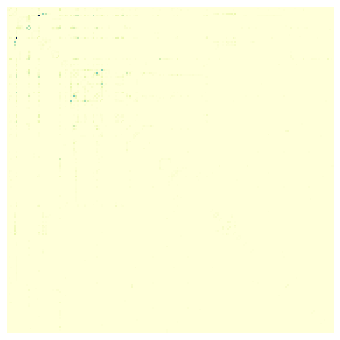

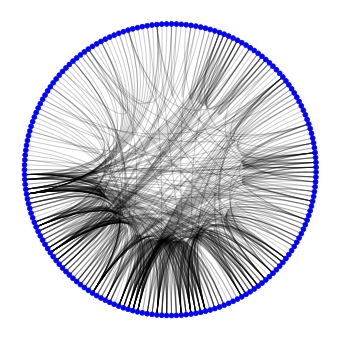

In [10]:
#These are several ways to desribe this network by graph. But most of them only explore purpose,
#most of them cannot present any useful infomation
#try to make visilization more readable
nx.spring_layout(G_book1)

#the most common way to draw picture
nx.draw(G_book1)
plt.show()

#arc way to draw social network, sometimess with order
ap=nv.ArcPlot(G_book1)
ap.draw()
plt.show()

#present a matrix with directed/undirected social network
matrix_1=nv.MatrixPlot(G_book1)
matrix_1.draw()

cir_1=nv.CircosPlot(G_book1)
cir_1.draw()

#show the nodes connected with Jon-Snow
G_book1.nodes('Jon-Snow')

"""
G_book1_edge_weight = [np.log(book1["weight"]/5) ]
plt.figure(figsize=(16,12))
nx.draw_networkx(G_book1, node_size=1, 
                 node_color='blue', alpha=0.7, with_labels=True, 
                 width=G_book1_edge_weight, edge_color='0.4', cmap=plt.cm.Blues)
"""

#G_book1.neighbors('')
neighbors_1=list(G_book1.neighbors("Jon-Snow"))
neighbors_1

In [17]:
#export gml, try to use Gephi to visualization, but it too complicated
nx.write_gml(G_book1,"06_G_book1_GML.gml")

<br>

<br>

<br>

## 4. Input all book together

Gather all nodes and edges information into one list <code>books</code>, this is a list and we also create a contain all Graph object <code>G_all_books</code>. We want to use medium size social network to anaylsis

In [16]:
# Creating a list of networks for all the books
books = [G_book1]              #first put book1 into this networkx type list
book_fnames = ['03_data/book2.csv', '03_data/book3.csv', '03_data/book4.csv', '03_data/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()                         #create a big dataset contain all five books
    for _, edge in book.iterrows():
         #create edge between Source and Target which have weight
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])   
    books.append(G_book)
# books[1] demenstrate first book graph data, books[2] contains books2 Graph information

In [15]:
#for a complicated network analysis, we should gather all node and analsis them
book_fnames = ['03_data/book1.csv','03_data/book2.csv', '03_data/book3.csv', '03_data/book4.csv', '03_data/book5.csv']
G_all_books=nx.Graph()
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    for _, edge in book.iterrows():
         #create edge between Source and Target which have weight
        G_all_books.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])   

In [18]:
print("Nodes number is:",len(G_all_books.nodes()))

print("Edges number is:", len(G_all_books.edges()))

Nodes number is: 796
Edges number is: 2823


In [17]:
#export gml, try to use Gephi to visualization, but it too complicated
nx.write_gml(G_book1,"06_G_book1_GML.gml")

In [18]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G_book1))

True


<br>

<br>

<br>

<br>

## 5. The most connective charater change during 5 books

We have multi-choice for our centrality measure. Different method have different purpose.

In [72]:
#Find who is the most connective charater with Jon-Snow.
#As we can imagine, the most frequent charater is Jer-Mormont, head of Night' watch
neighbors_0 = list(G_book1.neighbors('Jon-Snow'))
rank_0 = pd.Series([G_book1[c]['Jon-Snow']['weight'] for c in neighbors_0])
rank_0.index = neighbors_0
rank_0.sort_values(ascending=False, inplace=True)
rank_0.head(5)
type(rank_1.head(5))

Jeor-Mormont        81
Samwell-Tarly       81
Bran-Stark          56
Tyrion-Lannister    56
Robb-Stark          53
dtype: int64

pandas.core.series.Series

<BarContainer object of 5 artists>

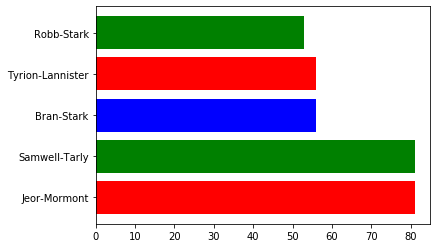

In [73]:
name_list=(rank_0.index).tolist()
plt.barh(range(len(rank_0.head(5))), rank_0.head(5), color='rgb',tick_label=name_list[0:5])
plt.show()

In [63]:
books[2]

Jeor-Mormont       63
Samwell-Tarly      52
Qhorin-Halfhand    47
Craster            26
Stonesnake         13
dtype: int64

<BarContainer object of 5 artists>

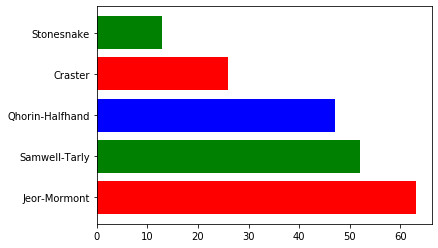

In [70]:
neighbors_1=list(books[1].neighbors("Jon-Snow"))
rank_1 = pd.Series([books[1][c]['Jon-Snow']['weight'] for c in neighbors_1])
rank_1.index = neighbors_1
rank_1.sort_values(ascending=False, inplace=True)
rank_1.head(5)
name_list=(rank_1.index).tolist()
plt.barh(range(len(rank_1.head(5))), rank_1.head(5), color='rgb',tick_label=name_list[0:5])
plt.show()

Mance-Rayder                       83
Ygritte                            54
Samwell-Tarly                      50
Styr                               40
Aemon-Targaryen-(Maester-Aemon)    36
dtype: int64

<BarContainer object of 5 artists>

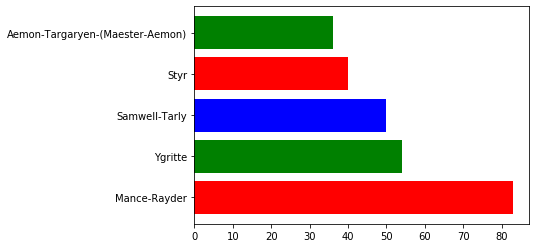

In [65]:
neighbors_2=list(books[2].neighbors("Jon-Snow"))
rank_2 = pd.Series([books[2][c]['Jon-Snow']['weight'] for c in neighbors_2])
rank_2.index = neighbors_2
rank_2.sort_values(ascending=False, inplace=True)
rank_2.head(5)
name_list=(rank_2.index).tolist()
plt.barh(range(len(rank_2.head(5))), rank_2.head(5), color='rgb',tick_label=name_list[0:5])
plt.show()

Samwell-Tarly                      31
Aemon-Targaryen-(Maester-Aemon)    17
Gilly                              15
Stannis-Baratheon                   6
Bran-Stark                          6
dtype: int64

<BarContainer object of 5 artists>

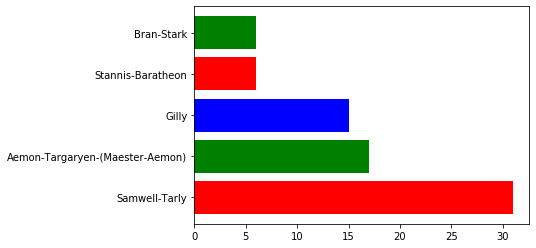

In [66]:
neighbors_3=list(books[3].neighbors("Jon-Snow"))
rank_3 = pd.Series([books[3][c]['Jon-Snow']['weight'] for c in neighbors_3])
rank_3.index = neighbors_3
rank_3.sort_values(ascending=False, inplace=True)
rank_3.head(5)
name_list=(rank_3.index).tolist()
plt.barh(range(len(rank_3.head(5))), rank_3.head(5), color='rgb',tick_label=name_list[0:5])
plt.show()

Stannis-Baratheon    73
Tormund              50
Melisandre           48
Bowen-Marsh          45
Selyse-Florent       38
dtype: int64

<BarContainer object of 5 artists>

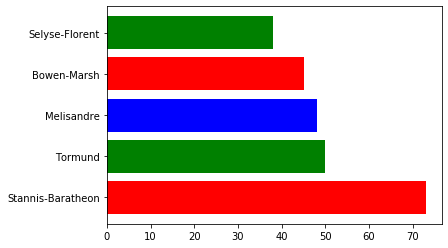

In [68]:
neighbors_4=list(books[4].neighbors("Jon-Snow"))
rank_4 = pd.Series([books[4][c]['Jon-Snow']['weight'] for c in neighbors_4])
rank_4.index = neighbors_4
rank_4.sort_values(ascending=False, inplace=True)
rank_4.head(5)
name_list=(rank_4.index).tolist()
plt.barh(range(len(rank_4.head(5))), rank_4.head(5), color='rgb',tick_label=name_list[0:5])
plt.show()

In [ ]:
"""
name_list = ['Jeor-Mormont',Mance-Rayder ','Samwell-Tarly','Stannis-Baratheon']
num_list = [rank_0.head(1),]
num_list1 = [1,2,3,1]
x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
 
plt.bar(x, num_list, width=width, label='boy',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list1, width=width, label='girl',tick_label = name_list,fc = 'r')
plt.legend()
plt.show()
"""

Other centralities measurement think Tyrion-Lannister is the most important, but Google pagerank think Jon-Snow is most important

In [92]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.pagerank(G_all_books)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

['Jon-Snow']


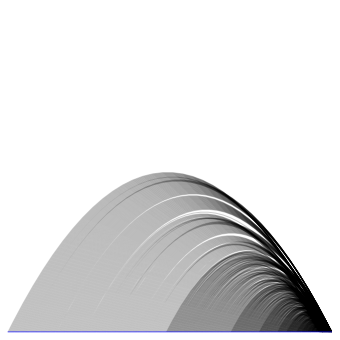

In [100]:
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G_all_books), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G_all_books.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G_all_books.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G_all_books.neighbors(node))),G_all_books.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc,node_order='degree centrality',node_labels=G_all_books.nodes())

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [12]:
#Find who is the most connective charater with Jon-Snow.
#As we can imagine, the most frequent charater is Jer-Mormont, head of Night' watch
#neighbors = list(G_book1.neighbors('Jon-Snow'))
rank = pd.Series([G_book1[c]['Jon-Snow']['weight'] for c in neighbors_1])
rank.index = neighbors_1
rank.sort_values(ascending=False, inplace=True)
rank.head(3)

Jeor-Mormont     81
Samwell-Tarly    81
Bran-Stark       56
dtype: int64

In [17]:
#export gml, try to use Gephi to visualization, but it too complicated
nx.write_gml(G_book1,"06_G_book1_GML.gml")

In [18]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G_book1))

True


<Figure size 432x288 with 0 Axes>

(array([139.,  19.,  13.,   4.,   5.,   3.,   2.,   1.,   0.,   1.]),
 array([0.00537634, 0.04032258, 0.07526882, 0.11021505, 0.14516129,
        0.18010753, 0.21505376, 0.25      , 0.28494624, 0.31989247,
        0.35483871]),
 <a list of 10 Patch objects>)

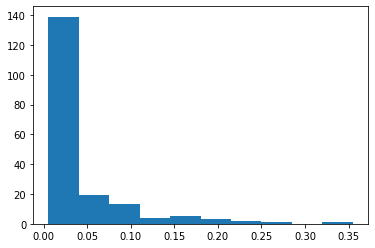

'\n# Plot a histogram of the degree distribution of the graph\nplt.figure()\nplt.hist(deg_cent)\nplt.show()\n\n# Plot a scatter plot of the centrality distribution and the degree distribution\nplt.figure()\nplt.scatter(x=deg_cent,y=list(deg_cent.values()))\nplt.show()\n'

In [33]:
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(G_book1)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()


"""
# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(deg_cent)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(x=deg_cent,y=list(deg_cent.values()))
plt.show()
"""

In [34]:
# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1,n2):
            in_triangle = True
            break
    return in_triangle

In [35]:

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1,n2):

            in_open_triangle = True

            break

    return in_open_triangle


In [36]:

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in G_book1.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(G_book1,n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

96


In [37]:
def maximal_cliques(G,size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
m=maximal_cliques(G_book1,3)
m

[['Timett', 'Shagga', 'Tyrion-Lannister'],
 ['Conn', 'Tyrion-Lannister', 'Shagga'],
 ['Stevron-Frey', 'Catelyn-Stark', 'Walder-Frey'],
 ['Jommo', 'Drogo', 'Ogo'],
 ['Will-(prologue)', 'Gared', 'Waymar-Royce'],
 ['Jon-Umber-(Greatjon)', 'Maege-Mormont', 'Rickard-Karstark'],
 ['Vardis-Egen', 'Catelyn-Stark', 'Colemon'],
 ['Shae', 'Bronn', 'Tyrion-Lannister'],
 ['Joseth', 'Bran-Stark', 'Luwin'],
 ['Hullen', 'Harwin', 'Jory-Cassel'],
 ['Tytos-Blackwood', 'Catelyn-Stark', 'Edmure-Tully'],
 ['Shagga', 'Tyrion-Lannister', 'Bronn'],
 ['Nestor-Royce', 'Brynden-Tully', 'Catelyn-Stark'],
 ['Samwell-Tarly', 'Jon-Snow', 'Robb-Stark'],
 ['Hosteen-Frey', 'Danwell-Frey', 'Jared-Frey'],
 ['Karyl-Vance', 'Marq-Piper', 'Edmure-Tully'],
 ['Balon-Swann', 'Renly-Baratheon', 'Sandor-Clegane'],
 ['Jyck', 'Morrec', 'Tyrion-Lannister'],
 ['Meryn-Trant', 'Syrio-Forel', 'Arya-Stark'],
 ['Heward', 'Jory-Cassel', 'Wyl-(guard)'],
 ['Addam-Marbrand', 'Jaime-Lannister', 'Tywin-Lannister'],
 ['Eddard-Stark', 'High-Sept

### Cliques

In [83]:
len(G_all_books.nodes())

796

In [82]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G_all_books)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

1166


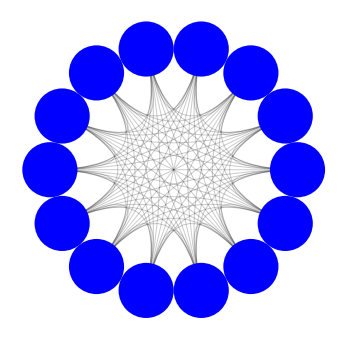

In [89]:
# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G_all_books), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G_all_books.subgraph(largest_clique)

# Create the CircosPlot object: c
cir_2 = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
cir_2.draw()
plt.show()

In [90]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G_all_books)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)


['Tyrion-Lannister']


In [91]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.eigenvector_centrality(G_all_books)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)


['Tyrion-Lannister']


Other centralities measurement think Tyrion-Lannister is the most important, but Google pagerank think Jon-Snow is most important

In [92]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.pagerank(G_all_books)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

['Jon-Snow']


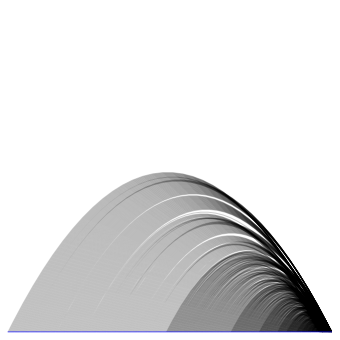

In [100]:
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G_all_books), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G_all_books.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G_all_books.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G_all_books.neighbors(node))),G_all_books.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc,node_order='degree centrality',node_labels=G_all_books.nodes())

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [41]:
print(nx.info(books[4]))

Name: 
Type: Graph
Number of nodes: 317
Number of edges: 760
Average degree:   4.7950


For social network, we care about which node is most important in all characters. Well differnet centralization will give different results. We can not use this centralization to decide importance but we can analyze depend on centralization data.

In [42]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1],reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x:x[1],reverse=True)[0:10]

# Printing out the top 10 of book1 and book5
#print(deg_cen_book1)
print("Top 10 in Book1:",sorted_deg_cen_book1,"\n")
print("Top 10 in Book5:",sorted_deg_cen_book5)

Top 10 in Book1: [('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)] 

Top 10 in Book5: [('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


Because characters maybe dead at any time in each book, So individual impontant at each book repsent nothing. We should consider importance from whole story.

In [97]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G_all_books)

# Compute the maximum degree centrality: max_dc, max_dc only contain max values, so we need put it back and find which one is biggest
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators, 
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)


['Tyrion-Lannister']


In [115]:
#find the several largest number 
# Compute the degree centralities of G: deg_cent
deg_cent_2 = nx.degree_centrality(G_all_books)

# Compute the maximum degree centrality: max_dc, max_dc only contain max values, so we need put it back and find which one is biggest
max_dc_3 = heapq.nlargest(3, deg_cent_2.values())

# Find the user(s) that have collaborated the most: prolific_collaborators, 
prolific_collaborators = [n for n, dc in deg_cent_2.items() if dc == max_dc_3]

# Print the most prolific collaborator(s)
print(prolific_collaborators)


[]


In [116]:
max_dc_3

[0.15345911949685534, 0.14339622641509434, 0.1270440251572327]

In [ ]:
p_c=[]
for n in deg_cent_2.itterate():
    n, df in deg_cent_2.item()
    

In [104]:
max_3=heapq.nlargest(3,deg_cent_2.values())
max_3

[0.15345911949685534, 0.14339622641509434, 0.1270440251572327]

In [86]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
print(type(evol))
evol

<class 'list'>


[{'Addam-Marbrand': 0.010752688172043012,
  'Jaime-Lannister': 0.15591397849462366,
  'Tywin-Lannister': 0.11827956989247312,
  'Aegon-I-Targaryen': 0.010752688172043012,
  'Daenerys-Targaryen': 0.11290322580645162,
  'Eddard-Stark': 0.3548387096774194,
  'Aemon-Targaryen-(Maester-Aemon)': 0.03763440860215054,
  'Alliser-Thorne': 0.05376344086021506,
  'Bowen-Marsh': 0.02688172043010753,
  'Chett': 0.016129032258064516,
  'Clydas': 0.005376344086021506,
  'Jeor-Mormont': 0.06989247311827958,
  'Jon-Snow': 0.19892473118279572,
  'Samwell-Tarly': 0.06451612903225806,
  'Aerys-II-Targaryen': 0.03225806451612903,
  'Brandon-Stark': 0.03225806451612903,
  'Gerold-Hightower': 0.02688172043010753,
  'Jon-Arryn': 0.08064516129032259,
  'Robert-Baratheon': 0.2688172043010753,
  'Aggo': 0.03225806451612903,
  'Drogo': 0.10215053763440861,
  'Jhogo': 0.03225806451612903,
  'Jorah-Mormont': 0.06989247311827958,
  'Quaro': 0.02688172043010753,
  'Rakharo': 0.02688172043010753,
  'Albett': 0.0161290

In [89]:
len(evol[0])

187

Our Dargon queen didn't show up in next three books... But obviously, Eddard is dead after book1

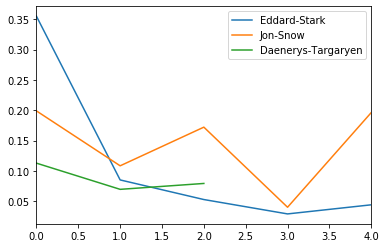

In [91]:
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark','Jon-Snow','Daenerys-Targaryen']].plot()

In [95]:
degree_evol_df.head()

,Addam-Marbrand,Aegon-Frey-(son-of-Stevron),Aegon-I-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Aegon-V-Targaryen,Aemon-Targaryen-(Dragonknight),Aemon-Targaryen-(Maester-Aemon),Aenys-Frey,Aeron-Greyjoy,Aerys-I-Targaryen,...,Yellow-Dick,Yezzan-zo-Qaggaz,Ygritte,Yohn-Royce,Yoren,Yorko-Terys,Ysilla,Yurkhaz-zo-Yunzak,Zei,Zollo
0,0.010753,NaN,0.010753,NaN,NaN,NaN,0.037634,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.037634,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.019380,NaN,0.003876,NaN,0.023256,0.003876,0.007752,0.003876,...,NaN,NaN,0.015504,NaN,0.046512,NaN,NaN,NaN,NaN,NaN
2,0.026490,0.013245,0.009934,0.003311,NaN,0.003311,0.059603,NaN,NaN,NaN,...,NaN,NaN,0.033113,0.003311,NaN,NaN,NaN,NaN,0.003311,0.006623
3,0.014652,NaN,NaN,0.003663,0.003663,NaN,0.025641,NaN,0.051282,NaN,...,NaN,NaN,NaN,0.029304,NaN,0.003663,NaN,NaN,NaN,0.007326
4,NaN,NaN,0.003165,0.047468,NaN,NaN,0.015823,0.009494,0.006329,NaN,...,0.009494,0.015823,0.006329,NaN,NaN,NaN,0.018987,0.003165,NaN,NaN


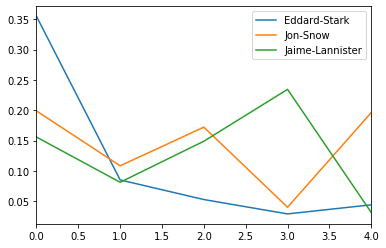

In [45]:
# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark','Jon-Snow','Jaime-Lannister']].plot()

Let' try do centrality analysis through all books

In [46]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book) for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol)

In [50]:
betweenness_evol_df.max()

Addam-Marbrand                      0.013273
Aegon-Frey-(son-of-Stevron)         0.000076
Aegon-I-Targaryen                   0.016445
Aegon-Targaryen-(son-of-Rhaegar)    0.021100
Aegon-V-Targaryen                   0.000000
Aemon-Targaryen-(Dragonknight)      0.000000
Aemon-Targaryen-(Maester-Aemon)     0.023165
Aenys-Frey                          0.000408
Aeron-Greyjoy                       0.050064
Aerys-I-Targaryen                   0.000000
Aerys-II-Targaryen                  0.029259
Aggar                               0.024813
Aggo                                0.000073
Alayaya                             0.007752
Albett                              0.000000
Alebelly                            0.000040
Alerie-Hightower                    0.000000
Alester-Florent                     0.000979
Alla-Tyrell                         0.000322
Allar-Deem                          0.000000
Allard-Seaworth                     0.007752
Alleras                             0.033318
Alliser-Th

In [47]:
# Finding the top 3 characters in every book
set_of_char_3 = set()
for i in range(5):
    set_of_char_3 |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:3].index))
list_of_char_3 = list(set_of_char_3)
list_of_char_3

['Tyrion-Lannister',
 'Jon-Snow',
 'Stannis-Baratheon',
 'Daenerys-Targaryen',
 'Arya-Stark',
 'Robert-Baratheon',
 'Robb-Stark',
 'Jaime-Lannister',
 'Eddard-Stark',
 'Cersei-Lannister']

In [48]:
# Finding the top 1 characters in every book
set_of_char_1 = set()
for i in range(5):
    set_of_char_1 |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:1].index))
list_of_char_1 = list(set_of_char_1)
list_of_char_1

['Eddard-Stark', 'Stannis-Baratheon', 'Jon-Snow', 'Arya-Stark']

After i saw these patterns, i think one character maybe descript and mentioned very frequently before he died, because audience should know what happen and writer show demenstrate his death. So Only those not mentioned too much but always been mentioned can live longer.

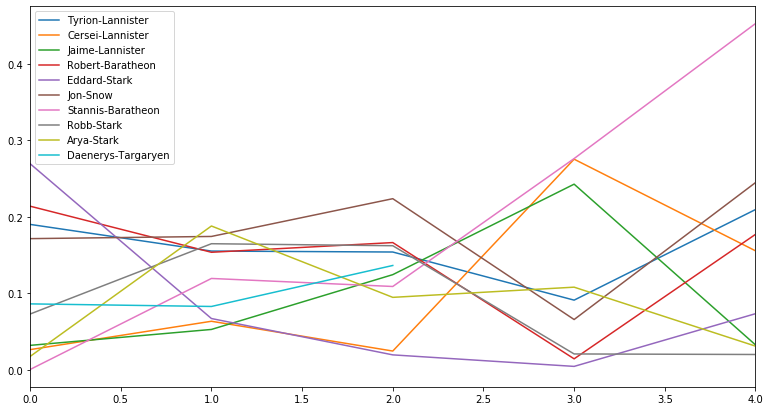

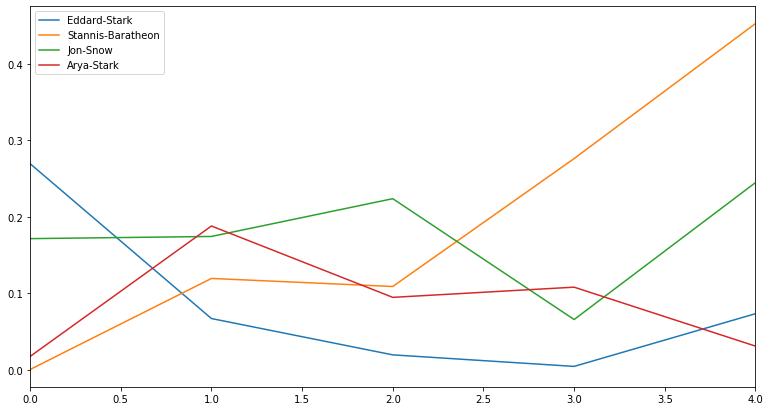

In [49]:
# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char_3].plot(figsize=(13,7))
betweenness_evol_df[list_of_char_1].plot(figsize=(13,7))

We have many different centrality measures, let's try to ues most famous GoogleRank algorithm to explore our dataset. And we should compare the different result from betweenness and GoogleRank.

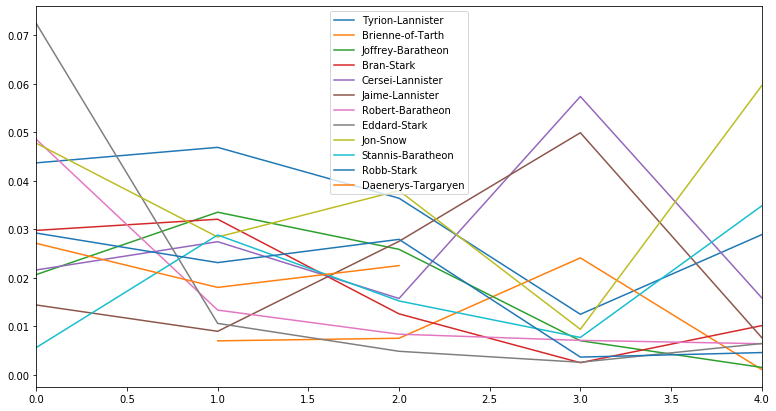

In [50]:
# Creating a list of pagerank of all the characters in all the books
evol_GR = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol_GR)

# Finding the top 3 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:3].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13,7))

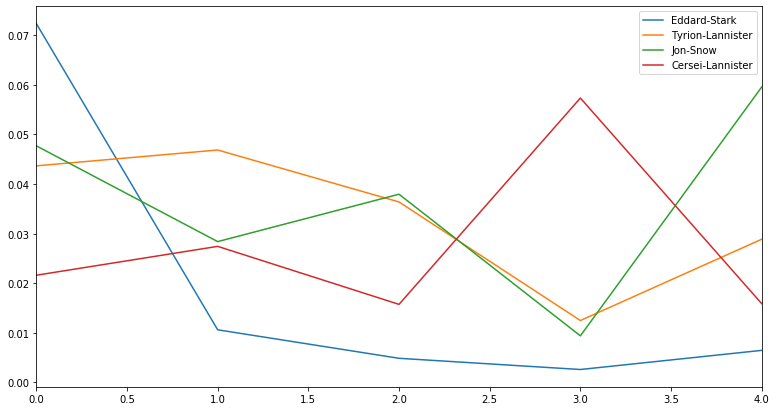

In [51]:
# Finding the top 1 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:1].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13,7))

In [94]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor_df = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor_df.idxmax

<bound method DataFrame.idxmax of    Aegon-I-Targaryen  Aegon-Targaryen-(son-of-Rhaegar)  \
0           0.000682                          0.008693   
1           0.000000                          0.049057   
2           0.003165                          0.047468   

   Aemon-Targaryen-(Maester-Aemon)  Aenys-Frey  Aeron-Greyjoy  \
0                         0.003236    0.001745       0.001313   
1                         0.006852    0.000000       0.006277   
2                         0.015823    0.009494       0.006329   

   Aerys-II-Targaryen      Aggo  Alliser-Thorne  Alys-Karstark  \
0            0.001642  0.002365        0.000872       0.002135   
1            0.000000  0.002969        0.000000       0.000000   
2            0.009494  0.018987        0.003165       0.009494   

   Alysane-Mormont  ...  Wun-Weg-Wun-Dar-Wun  Wylis-Manderly  Wyman-Manderly  \
0         0.002910  ...             0.002419        0.000693        0.009620   
1         0.000498  ...             0.000070   

In [60]:
cor_df.head()

,Aegon-I-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Aemon-Targaryen-(Maester-Aemon),Aenys-Frey,Aeron-Greyjoy,Aerys-II-Targaryen,Aggo,Alliser-Thorne,Alys-Karstark,Alysane-Mormont,...,Wun-Weg-Wun-Dar-Wun,Wylis-Manderly,Wyman-Manderly,Xaro-Xhoan-Daxos,Yandry,Yellow-Dick,Yezzan-zo-Qaggaz,Ygritte,Ysilla,Yurkhaz-zo-Yunzak
0,0.000682,0.008693,0.003236,0.001745,0.001313,0.001642,0.002365,0.000872,0.002135,0.002910,...,0.002419,0.000693,0.009620,0.001455,0.003944,0.001527,0.003352,0.001596,0.002882,0.000682
1,0.000000,0.049057,0.006852,0.000000,0.006277,0.000000,0.002969,0.000000,0.000000,0.000498,...,0.000070,0.000000,0.061129,0.000000,0.000000,0.000441,0.000057,0.000000,0.005425,0.000000
2,0.003165,0.047468,0.015823,0.009494,0.006329,0.009494,0.018987,0.003165,0.009494,0.009494,...,0.012658,0.003165,0.044304,0.006329,0.022152,0.009494,0.015823,0.006329,0.018987,0.003165


In [74]:
cor_df.iloc[2,:].max()

0.1962025316455696

In [54]:
corr=cor_df.corr()
corr

,Aegon-I-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Aemon-Targaryen-(Maester-Aemon),Aenys-Frey,Aeron-Greyjoy,Aerys-II-Targaryen,Aggo,Alliser-Thorne,Alys-Karstark,Alysane-Mormont,...,Wun-Weg-Wun-Dar-Wun,Wylis-Manderly,Wyman-Manderly,Xaro-Xhoan-Daxos,Yandry,Yellow-Dick,Yezzan-zo-Qaggaz,Ygritte,Ysilla,Yurkhaz-zo-Yunzak
Aegon-I-Targaryen,1.000000,0.278893,0.882815,0.999467,0.320632,0.999048,0.971752,0.997956,0.999952,0.998448,...,0.999555,0.999994,-0.008652,0.999886,0.999258,0.995381,0.999977,0.999249,0.938126,1.000000
Aegon-Targaryen-(son-of-Rhaegar),0.278893,1.000000,0.697294,0.310094,0.999043,0.320525,0.497653,0.216958,0.269464,0.224971,...,0.307418,0.275465,0.957873,0.264389,0.315685,0.369802,0.285400,0.241484,0.594191,0.278893
Aemon-Targaryen-(Maester-Aemon),0.882815,0.697294,1.000000,0.897679,0.727980,0.902468,0.968733,0.850996,0.878167,0.855281,...,0.896435,0.881133,0.462065,0.875636,0.900257,0.923834,0.885981,0.863957,0.990853,0.882815
Aenys-Frey,0.999467,0.310094,0.897679,1.000000,0.351383,0.999940,0.978939,0.995338,0.999099,0.996097,...,0.999996,0.999344,0.023997,0.998862,0.999983,0.997984,0.999665,0.997452,0.948931,0.999467
Aeron-Greyjoy,0.320632,0.999043,0.727980,0.351383,1.000000,0.361652,0.535117,0.259450,0.311330,0.267376,...,0.348747,0.317250,0.944394,0.306321,0.356887,0.410089,0.327049,0.283700,0.628804,0.320632
Aerys-II-Targaryen,0.999048,0.320525,0.902468,0.999940,0.361652,1.000000,0.981124,0.994218,0.998572,0.995067,...,0.999905,0.998886,0.034984,0.998277,0.999987,0.998622,0.999321,0.996608,0.952341,0.999048
Aggo,0.971752,0.497653,0.968733,0.978939,0.535117,0.981124,1.000000,0.954686,0.969392,0.957099,...,0.978361,0.970904,0.227586,0.968085,0.980124,0.989921,0.973331,0.961881,0.993353,0.971752
Alliser-Thorne,0.997956,0.216958,0.850996,0.995338,0.259450,0.994218,0.954686,1.000000,0.998535,0.999966,...,0.995606,0.998178,-0.072532,0.998806,0.994753,0.987212,0.997500,0.999683,0.914080,0.997956
Alys-Karstark,0.999952,0.269464,0.878167,0.999099,0.311330,0.998572,0.969392,0.998535,1.000000,0.998946,...,0.999214,0.999981,-0.018455,0.999986,0.998832,0.994392,0.999862,0.999581,0.934686,0.999952
Alysane-Mormont,0.998448,0.224971,0.855281,0.996097,0.267376,0.995067,0.957099,0.999966,0.998946,1.000000,...,0.996342,0.998640,-0.064336,0.999174,0.995560,0.988488,0.998047,0.999856,0.917381,0.998448


In [76]:
"""
#plot a heatmap to find out the highly correatled variables
plt.figure(figsize = (16,5))
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdBu',annot=True, linewidths=.5)
"""

"\n#plot a heatmap to find out the highly correatled variables\nplt.figure(figsize = (16,5))\nsns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdBu',annot=True, linewidths=.5)\n"

In [26]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
for i,v in enumerate(cor.iloc[0,:]):
    if v==max(cor.iloc[0,:]):
        print(i)

143


In [27]:
cor.iloc[:,143]

0    0.059572
1    0.205652
2    0.196203
Name: Jon-Snow, dtype: float64

In [50]:
#try to find shortest way from Addam to Alliser
#nx.shortest_path(G_book1, "John-Snow", "Alliser-Thorne")

In [38]:
book1[book1["Source"]=='Jon-Snow']

,Source,Target,Type,weight,book
493,Jon-Snow,Jory-Cassel,Undirected,3,1
494,Jon-Snow,Luwin,Undirected,10,1
495,Jon-Snow,Matthar,Undirected,3,1
496,Jon-Snow,Mordane,Undirected,4,1
497,Jon-Snow,Othor,Undirected,5,1
498,Jon-Snow,Pypar,Undirected,45,1
499,Jon-Snow,Rast,Undirected,8,1
500,Jon-Snow,Rickon-Stark,Undirected,11,1
501,Jon-Snow,Robb-Stark,Undirected,53,1
502,Jon-Snow,Robert-Baratheon,Undirected,18,1


In [39]:
print(nx.info(G_book1))

Name: 
Type: Graph
Number of nodes: 187
Number of edges: 684
Average degree:   7.3155


In [ ]:
Stannis-Baratheo

Connected components
A subset of nodes such as:
- 1. Every node in the subset has a path to every other nodes
- 2. No other node has a path to any node in the subset

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G_book1)
largest_component = max(components, key=len)
largest_component

#The number of components in G_book1 and we only have one compnent in this network, which means all nodes are connected with eachother
number_components=nx.number_connected_components(G_book1)
number_components

node_Jon=nx.node_connected_component(G_book1,"Jon-Snow")
node_Jon

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#this result have a lillte different from real world where only 6 degree will connect other side of people

subgraph = G_book1.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

In [21]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G_book1)
largest_component = max(components, key=len)
largest_component

{'Addam-Marbrand',
 'Aegon-I-Targaryen',
 'Aemon-Targaryen-(Maester-Aemon)',
 'Aerys-II-Targaryen',
 'Aggo',
 'Albett',
 'Alliser-Thorne',
 'Alyn',
 'Arthur-Dayne',
 'Arya-Stark',
 'Arys-Oakheart',
 'Balon-Greyjoy',
 'Balon-Swann',
 'Barristan-Selmy',
 'Benjen-Stark',
 'Beric-Dondarrion',
 'Boros-Blount',
 'Bowen-Marsh',
 'Bran-Stark',
 'Brandon-Stark',
 'Bronn',
 'Brynden-Tully',
 'Catelyn-Stark',
 'Cayn',
 'Cersei-Lannister',
 'Chella',
 'Chett',
 'Chiggen',
 'Clement-Piper',
 'Clydas',
 'Cohollo',
 'Colemon',
 'Conn',
 'Coratt',
 'Daenerys-Targaryen',
 'Danwell-Frey',
 'Dareon',
 'Daryn-Hornwood',
 'Desmond',
 'Dolf',
 'Donal-Noye',
 'Donnel-Waynwood',
 'Doreah',
 'Drogo',
 'Dywen',
 'Eddard-Stark',
 'Edmure-Tully',
 'Eon-Hunter',
 'Eroeh',
 'Fogo',
 'Galbart-Glover',
 'Gared',
 'Gendry',
 'Gerold-Hightower',
 'Gregor-Clegane',
 'Grenn',
 'Gunthor-son-of-Gurn',
 'Haggo',
 'Halder',
 'Hali',
 'Hallis-Mollen',
 'Harwin',
 'Harys-Swyft',
 'Heward',
 'High-Septon-(fat_one)',
 'Hobb',
 '

In [28]:
#The number of components in G_book1 and we only have one compnent in this network, which means all nodes are connected with eachother
number_components=nx.number_connected_components(G_book1)
number_components

1

In [26]:
node_Jon=nx.node_connected_component(G_book1,"Jon-Snow")
node_Jon

{'Addam-Marbrand',
 'Aegon-I-Targaryen',
 'Aemon-Targaryen-(Maester-Aemon)',
 'Aerys-II-Targaryen',
 'Aggo',
 'Albett',
 'Alliser-Thorne',
 'Alyn',
 'Arthur-Dayne',
 'Arya-Stark',
 'Arys-Oakheart',
 'Balon-Greyjoy',
 'Balon-Swann',
 'Barristan-Selmy',
 'Benjen-Stark',
 'Beric-Dondarrion',
 'Boros-Blount',
 'Bowen-Marsh',
 'Bran-Stark',
 'Brandon-Stark',
 'Bronn',
 'Brynden-Tully',
 'Catelyn-Stark',
 'Cayn',
 'Cersei-Lannister',
 'Chella',
 'Chett',
 'Chiggen',
 'Clement-Piper',
 'Clydas',
 'Cohollo',
 'Colemon',
 'Conn',
 'Coratt',
 'Daenerys-Targaryen',
 'Danwell-Frey',
 'Dareon',
 'Daryn-Hornwood',
 'Desmond',
 'Dolf',
 'Donal-Noye',
 'Donnel-Waynwood',
 'Doreah',
 'Drogo',
 'Dywen',
 'Eddard-Stark',
 'Edmure-Tully',
 'Eon-Hunter',
 'Eroeh',
 'Fogo',
 'Galbart-Glover',
 'Gared',
 'Gendry',
 'Gerold-Hightower',
 'Gregor-Clegane',
 'Grenn',
 'Gunthor-son-of-Gurn',
 'Haggo',
 'Halder',
 'Hali',
 'Hallis-Mollen',
 'Harwin',
 'Harys-Swyft',
 'Heward',
 'High-Septon-(fat_one)',
 'Hobb',
 '

In [29]:
# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#this result have a lillte different from real world where only 6 degree will connect other side of people

subgraph = G_book1.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 7


In [29]:
# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#this result have a lillte different from real world where only 6 degree will connect other side of people

subgraph = G_book1.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 7
